<a href="https://colab.research.google.com/github/jacobbstephen/ML_Programs/blob/main/GoldPricePredicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt

In [56]:
gold_data = pd.read_csv('/content/gold_price_data.csv')

In [6]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


Find any null values

In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Since there is no null values we can do move on to next step
Lets find some relation to decide which model to use

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [57]:
gd = gold_data.drop('Date', axis = 1)

<Axes: >

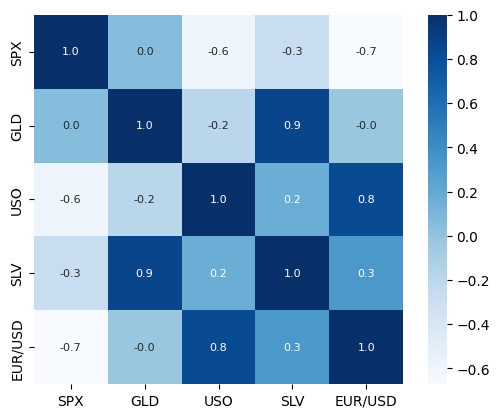

In [59]:
correlation = gd.corr()

sns.heatmap(correlation,cbar = True,square = True, fmt = '.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [60]:
print(gold_data.columns)

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')


In [61]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(gold_data['Date'])
gold_data['Date'] = labels

In [62]:
gold_data.dtypes

Date         int64
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [63]:
X = gold_data.drop('GLD',axis = 1)
Y =  gold_data['GLD']
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)


RandomForestRegressor()

Test the Model

In [64]:
train_data_prediction =  model.predict(X_train)
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9988061770259021


In [65]:
test_data_prediction =  model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9907963553272973


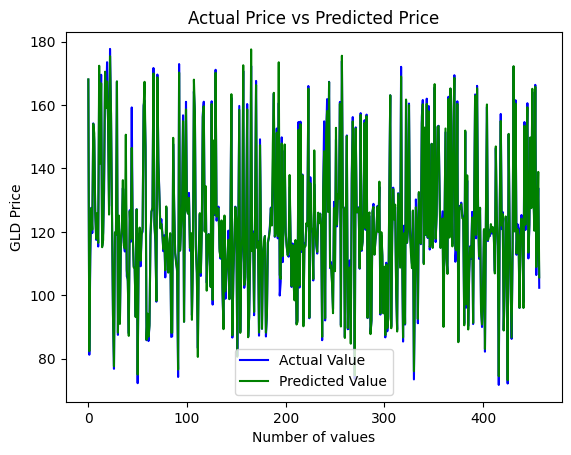

In [67]:
Y_test = list(Y_test)#convert into a list otherwise it might show error
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()